In [1]:
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

## Sorting data
- The goal is to sort the data which is necessary for calculating The Bayesian Average of ratings
    - Prior mean
    - Prior weight
    - Average rating score of each game
    - Number of rating of each game

In [2]:
df = pd.read_csv('bgg.csv')
df

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.0
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.0
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.0
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.0
...,...,...,...
1082162,11906,Source of the Nile: Tributary,5.0
1082163,11906,Source of the Nile: Tributary,NaN
1082164,11906,Source of the Nile: Tributary,NaN
1082165,11906,Source of the Nile: Tributary,NaN


In [3]:
df_no_nan=df.dropna().reset_index(drop=True)
df_no_nan

,game,title,rating
0,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.00
1,25984,Trivial Pursuit: Genus IV – Canadian Edition,5.00
2,25984,Trivial Pursuit: Genus IV – Canadian Edition,3.00
3,25984,Trivial Pursuit: Genus IV – Canadian Edition,7.00
4,25984,Trivial Pursuit: Genus IV – Canadian Edition,6.00
...,...,...,...
706808,11906,Source of the Nile: Tributary,8.00
706809,11906,Source of the Nile: Tributary,8.00
706810,11906,Source of the Nile: Tributary,9.00
706811,11906,Source of the Nile: Tributary,7.25


In [24]:
game_rating_number=df_no_nan['title'].value_counts()
game_rating_number

title
Cosmic Encounter                        312
Gettysburg                              221
Dune                                    198
Lord of the Rings: The Confrontation    169
Arkham Horror                           167
                                       ... 
Aventuria                                 1
Erbschleicher AG                          1
Peter Funk's Winning Words                1
Music Mystery                             1
Der Blaumilch-Kanal                       1
Name: count, Length: 23264, dtype: int64

In [5]:
game_rating_average = df_no_nan.groupby('title')['rating'].mean()
game_rating_average

title
!dentity Crisis?                                       5.844444
#MyLife                                                5.714286
&Cetera                                                7.306452
'65: Squad-Level Combat in the Jungles of Vietnam      7.612500
'CA' Tactical Naval Warfare in the Pacific, 1941-45    4.513514
                                                         ...   
なつめも (Natsumemo)                                       7.916667
ひとひら (Hitohira)                                        6.166667
カマクラコレクション (Kamakura Collection)                       7.500000
ボブジテン (Bob Jiten)                                      7.333333
猿道 (Monkey Road)                                       5.784444
Name: rating, Length: 23264, dtype: float64

In [6]:
game_rating_sum = df_no_nan.groupby('title')['rating'].sum()
game_rating_sum

title
!dentity Crisis?                                        52.60
#MyLife                                                 40.00
&Cetera                                                226.50
'65: Squad-Level Combat in the Jungles of Vietnam      304.50
'CA' Tactical Naval Warfare in the Pacific, 1941-45    167.00
                                                        ...  
なつめも (Natsumemo)                                       142.50
ひとひら (Hitohira)                                         74.00
カマクラコレクション (Kamakura Collection)                        30.00
ボブジテン (Bob Jiten)                                       44.00
猿道 (Monkey Road)                                        52.06
Name: rating, Length: 23264, dtype: float64

In [7]:
sub_table= pd.merge(game_rating_sum, game_rating_number, on = 'title')
sub_table

,rating,count
title,,
!dentity Crisis?,52.60,9
#MyLife,40.00,7
&Cetera,226.50,31
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37
...,...,...
なつめも (Natsumemo),142.50,18
ひとひら (Hitohira),74.00,12
カマクラコレクション (Kamakura Collection),30.00,4


In [8]:
full_table=pd.merge(sub_table, game_rating_average, on = 'title')
full_table

,rating_x,count,rating_y
title,,,
!dentity Crisis?,52.60,9,5.844444
#MyLife,40.00,7,5.714286
&Cetera,226.50,31,7.306452
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514
...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667
ひとひら (Hitohira),74.00,12,6.166667
カマクラコレクション (Kamakura Collection),30.00,4,7.500000


In [9]:
full_table.rename(columns={'rating_x': 'rating_sum', 'count': 'rating_number', 'rating_y': 'rating_average'}, inplace=True)
full_table

,rating_sum,rating_number,rating_average
title,,,
!dentity Crisis?,52.60,9,5.844444
#MyLife,40.00,7,5.714286
&Cetera,226.50,31,7.306452
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514
...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667
ひとひら (Hitohira),74.00,12,6.166667
カマクラコレクション (Kamakura Collection),30.00,4,7.500000


In [10]:
rating_number_array = full_table['rating_number'].values
rating_average_array = full_table['rating_average'].values

In [11]:
prior_weight = np.mean(rating_number_array)
prior_average = np.mean(rating_average_array)
print('prior weight:', prior_weight)
print('prior average:', prior_average)

prior weight: 30.382264442916092
prior average: 6.119832661544632


## The full rating table
- The goal is to create a table which shows both the average ratings and the bayesian average ratings

In [12]:
from Board_Game_Project.function import bayesian_average_funct

In [13]:
full_table['bayesian_average']= full_table.apply(lambda row: bayesian_average_funct(row), axis =1)

In [14]:
full_table

,rating_sum,rating_number,rating_average,bayesian_average
title,,,,
!dentity Crisis?,52.60,9,5.844444,6.056898
#MyLife,40.00,7,5.714286,6.043892
&Cetera,226.50,31,7.306452,6.719113
'65: Squad-Level Combat in the Jungles of Vietnam,304.50,40,7.612500,6.968153
"'CA' Tactical Naval Warfare in the Pacific, 1941-45",167.00,37,4.513514,5.237793
...,...,...,...,...
なつめも (Natsumemo),142.50,18,7.916667,6.788322
ひとひら (Hitohira),74.00,12,6.166667,6.133093
カマクラコレクション (Kamakura Collection),30.00,4,7.500000,6.280400


- Table of Average rating scores

In [33]:
Sub_table1 = full_table[['rating_number', 'rating_average']]
Average_table = Sub_table1.sort_values(by='rating_average', ascending=False)
Average_table

,rating_number,rating_average
title,,
Zamitar,1,10.0
Junk,2,10.0
David Dickinson's Antique Chase,1,10.0
Baseball Mania,1,10.0
Medieval Warfare,1,10.0
...,...,...
Piratack,2,1.0
Barbary Coast War (Second Edition),4,1.0
Don't Point the Finger,2,1.0


- Table of Bayesian Average rating scores

In [34]:
Sub_table2 = full_table[['rating_number', 'bayesian_average']]
Bayesian_table = Sub_table2.sort_values(by='bayesian_average', ascending=False)
Bayesian_table

,rating_number,bayesian_average
title,,
Dungeon Universalis,79,8.681246
TerroriXico,43,8.352623
Core Space,76,8.279899
Skytear,69,8.254334
Goblin Grapple,88,8.173812
...,...,...
Bunco,74,3.519510
Chutes and Ladders,84,3.512471
Tic-Tac-Toe,90,3.474635


## Data Visualization:
- The goal is to graphically spot the difference in considering Average and Bayesian average in rating games 
    - Scatter plot 'Game ratings based on Average score'
    -  Scatter plot 'Game ratings based on Bayesian Average score'

In [17]:
x = full_table['rating_number']
y = full_table['rating_average']
z = full_table['bayesian_average']

In [18]:
from Board_Game_Project.Data_Visualization import DataVisualization

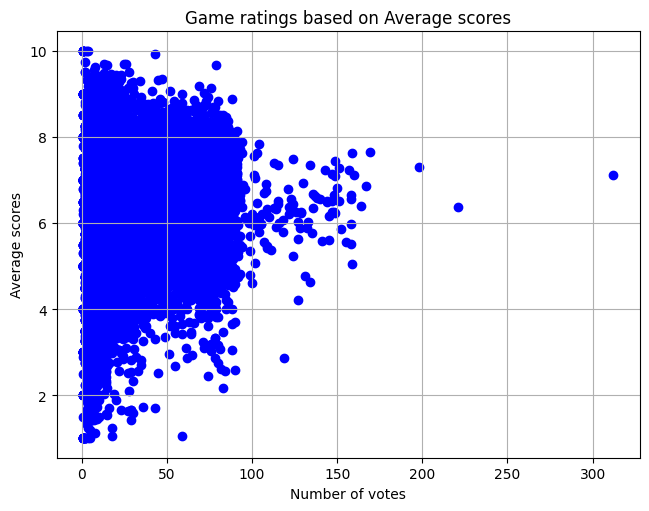

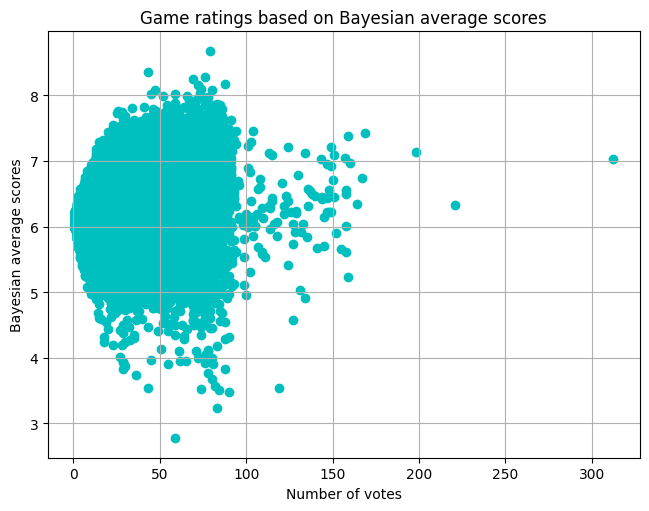

In [35]:
viz = DataVisualization(x,y,z)
viz.plot_average_ranking()
viz.plot_bayesian_ranking()